In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import sys
sys.path.append("../../..")
from utils import utils, postprocessing_utils as post
from utils.plotting_utils import plots

In [17]:
def make_plot(task, short_model_name, metric):
    params = {
        "results_dir": "../../../results/",
        "experiment": "acl",
        "short_model_name": short_model_name,
        "task": task,
        "metric": metric
    }

    M = post.Metrics(**params)
    df = M.transfer_loss()
    df.loc[:, ["Within-Score", "Cross-Score", "Transfer-Loss"]] *= 100
    df = df.groupby(["Train-Group", "Train-Language"], as_index=False, sort=False).mean()

    plots.scatter(x="Within-Score",
                  y="Transfer-Loss",
                  data=df,
                  xaxis_title="In-language Score",
                  yaxis_title="Average Transfer Loss",
                  title=(task + " " + short_model_name).upper(),
                  fit_reg=True)

    print(pearsonr(x=df["Within-Score"], y=df["Transfer-Loss"]))

# PoS

In [2]:
task = "pos"
metric = "Accuracy"

(0.7186940698400692, 0.0011519328104980559)
Saving to ../../../results/acl/mbert/plots/within_vs_transfer_pos.pdf


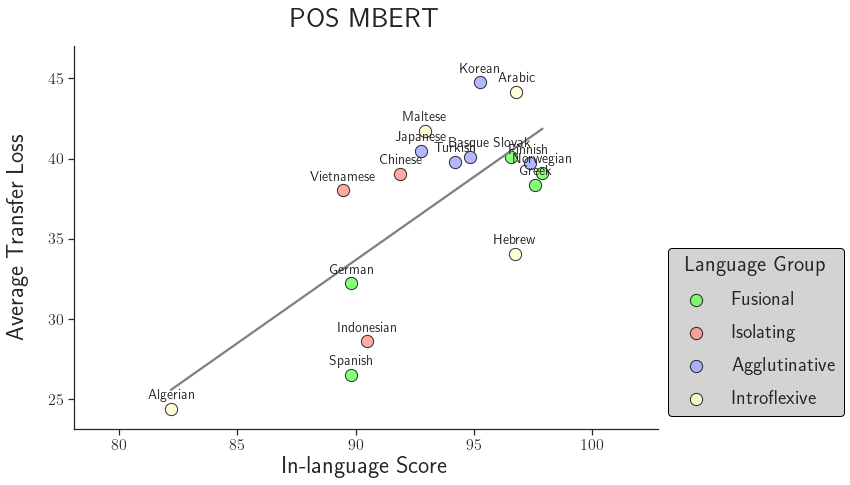

In [19]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric)
save_to = "../../../results/acl/{}/plots/within_vs_transfer_{}.pdf".format(short_model_name, task)
print("Saving to", save_to)
plt.savefig(save_to, dpi=400, bbox_inches="tight")

(0.6188840421035375, 0.008078121623989786)
Saving to ../../../results/acl/xlm-roberta/plots/within_vs_transfer_pos.pdf


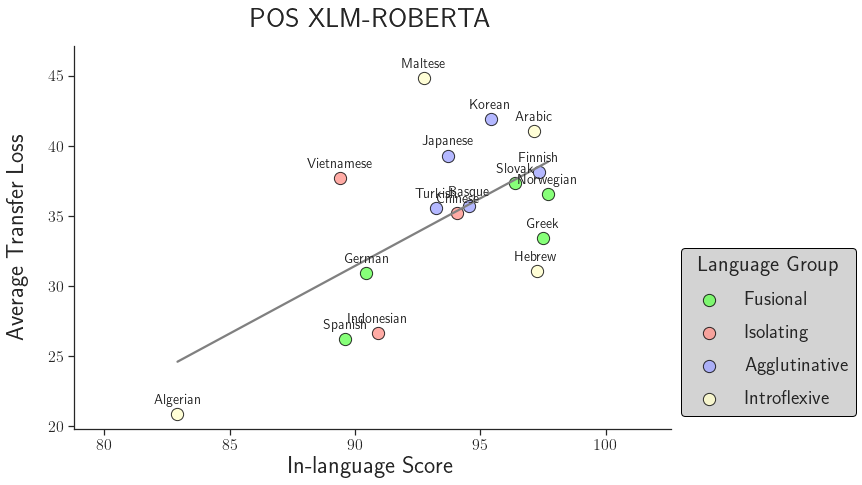

In [20]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric)
save_to = "../../../results/acl/{}/plots/within_vs_transfer_{}.pdf".format(short_model_name, task)
print("Saving to", save_to)
plt.savefig(save_to, dpi=400, bbox_inches="tight")

# Sentiment

In [21]:
task = "sentiment"
metric = "Macro_F1"

(0.6043620915447763, 0.006129807585477395)
Saving to ../../../results/acl/mbert/plots/within_vs_transfer_sentiment.pdf


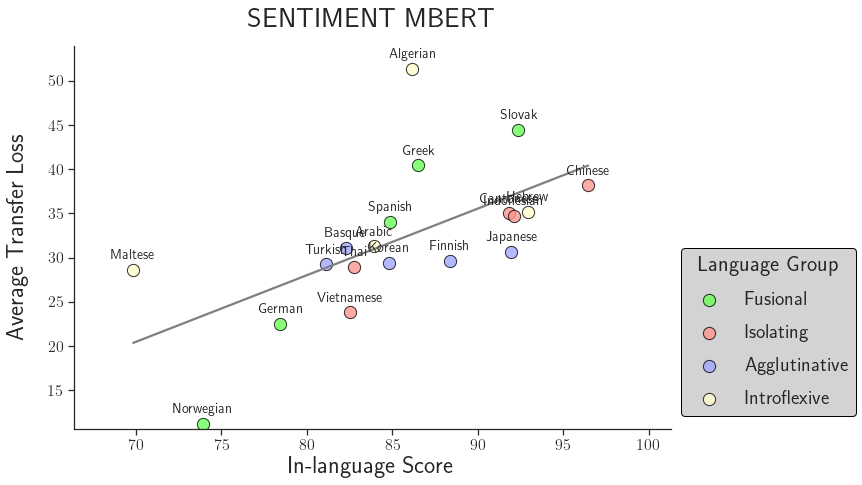

In [22]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric)
save_to = "../../../results/acl/{}/plots/within_vs_transfer_{}.pdf".format(short_model_name, task)
print("Saving to", save_to)
plt.savefig(save_to, dpi=400, bbox_inches="tight")

(0.42522152911708133, 0.06953446559463776)
Saving to ../../../results/acl/xlm-roberta/plots/within_vs_transfer_sentiment.pdf


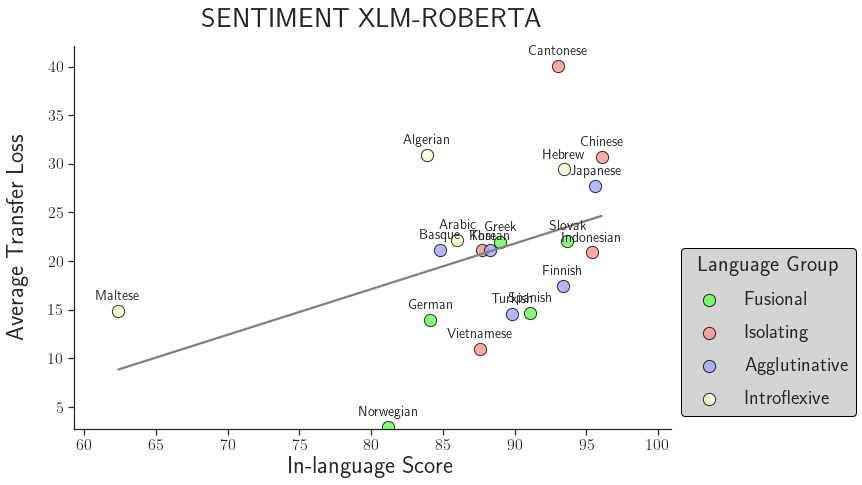

In [23]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric)
save_to = "../../../results/acl/{}/plots/within_vs_transfer_{}.pdf".format(short_model_name, task)
print("Saving to", save_to)
plt.savefig(save_to, dpi=400, bbox_inches="tight")